In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  
import warnings 
import os,joblib
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cust_satisfaction.csv')
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [4]:
df.describe()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,3.358158,3.631833,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.332991,1.180903,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,4.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [5]:
df.duplicated().sum()

172

In [6]:
df.isnull().sum()

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [8]:
female = df[df['Gender']=='Female']['Customer Type'].value_counts()
female

Customer Type
Loyal Customer       42336
disloyal Customer    10240
Name: count, dtype: int64

In [9]:
male = df[df['Gender']=='Male']['Customer Type'].value_counts()
male

Customer Type
Loyal Customer       42326
disloyal Customer     8692
Name: count, dtype: int64

In [10]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58697
satisfied                  44897
Name: count, dtype: int64

In [11]:
#first check imbalance or  balance

In [12]:
class_counts = df['Class'].value_counts()

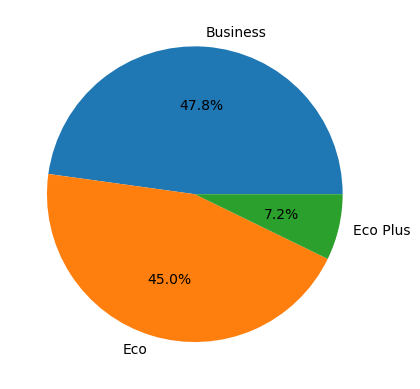

In [13]:
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.show()

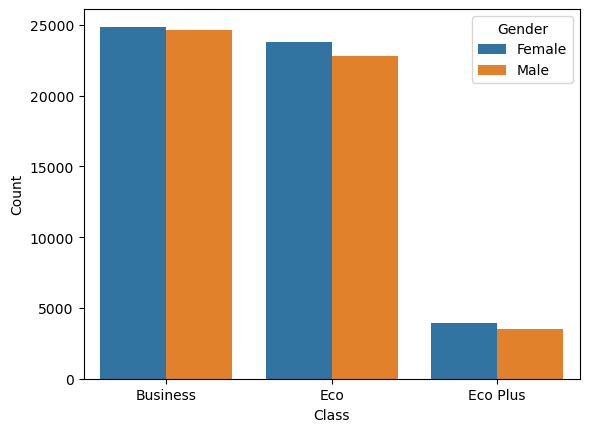

In [14]:
class_gender = df.groupby(['Class', 'Gender']).size().reset_index(name='Count')
sns.barplot(x='Class', y='Count', hue='Gender', data=class_gender)
plt.show()

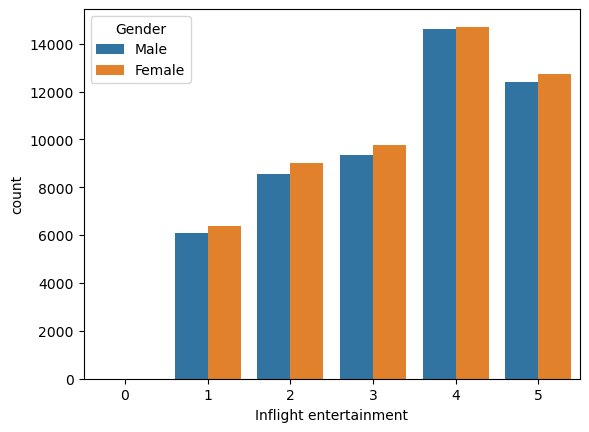

In [15]:
sns.countplot(x='Inflight entertainment', hue='Gender', data=df)
plt.show()

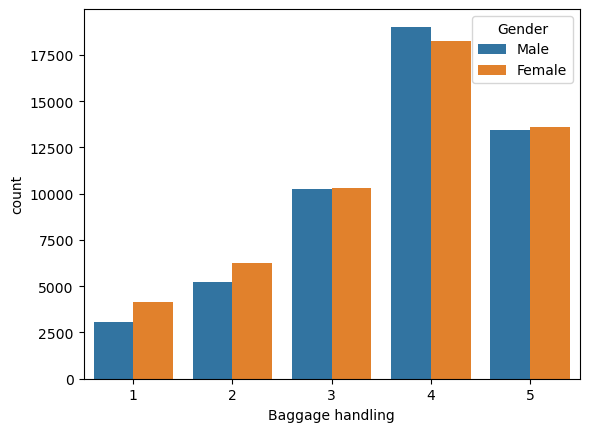

In [16]:
sns.countplot(x='Baggage handling', hue='Gender', data=df)
plt.show()

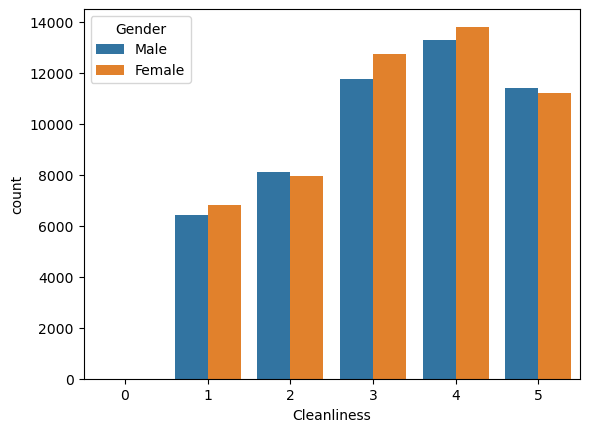

In [17]:
sns.countplot(x='Cleanliness', hue='Gender', data=df)
plt.show()

In [18]:
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


In [19]:
# from sklearn.preprocessing import OneHotEncoder , labelencoder
df2 = pd.get_dummies(df,drop_first='if_binary').astype(int)
df2

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,13,460,5,4,5,25,18,1,0,1,0,1,0
1,25,235,1,3,1,1,6,1,1,0,0,0,0
2,26,1142,5,4,5,0,0,0,0,0,0,0,1
3,25,562,2,3,2,11,9,0,0,0,0,0,0
4,61,214,3,4,3,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,4,2,3,0,0,1,0,1,0,0
103900,49,2347,5,5,4,0,0,1,0,0,0,0,1
103901,30,1995,4,4,4,7,14,1,1,0,0,0,0
103902,22,1000,1,1,1,0,0,0,1,0,1,0,0


In [20]:
x = df2.drop('satisfaction_satisfied',axis='columns')
y = df2[['satisfaction_satisfied']]

In [21]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
lgr = LogisticRegression()

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)  

In [23]:
lgr.fit(x_train,y_train)
print('Training:',lgr.score(x_train,y_train)*100,' Testing:',lgr.score(x_test,y_test)*100)

Training: 78.13695324283559  Testing: 78.517302958637


In [24]:
pred = lgr.predict(x_test)

In [25]:
y_test['prediction'] = pred

In [26]:
y_test.head(40)

,satisfaction_satisfied,prediction
5661,0,0
101182,0,1
94197,1,1
3839,0,1
52115,0,1
78876,1,1
7664,0,1
83761,0,1
91639,0,1
25363,1,1


In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
confusion_matrix(y_test['satisfaction_satisfied'],y_test['prediction'])

array([[9178, 2593],
       [1858, 7090]], dtype=int64)

In [29]:
#confusion matrix

In [30]:
print(classification_report(y_test['satisfaction_satisfied'],y_test['prediction']))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80     11771
           1       0.73      0.79      0.76      8948

    accuracy                           0.79     20719
   macro avg       0.78      0.79      0.78     20719
weighted avg       0.79      0.79      0.79     20719



In [41]:
os.makedirs('models',exist_ok=True)
joblib.dump(lgr,'./models/logistic_Regression.lb')

['./models/logistic_Regression.lb']

In [32]:
lgr

LogisticRegression()

In [33]:
x_train.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
64063,45,472,5,5,4,0,0,0,0,0,1,0
61498,28,1610,4,5,4,0,0,1,0,0,0,0
83850,46,522,3,4,3,2,0,1,0,1,1,0
90690,34,196,1,5,1,0,0,1,0,1,1,0
15687,40,558,1,5,1,0,0,0,0,1,1,0


In [34]:
y_train.head()

,satisfaction_satisfied
64063,1
61498,1
83850,0
90690,0
15687,0


In [35]:
x

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,5,4,5,25,18,1,0,1,0,1
1,25,235,1,3,1,1,6,1,1,0,0,0
2,26,1142,5,4,5,0,0,0,0,0,0,0
3,25,562,2,3,2,11,9,0,0,0,0,0
4,61,214,3,4,3,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,4,2,3,0,0,1,0,1,0
103900,49,2347,5,5,4,0,0,1,0,0,0,0
103901,30,1995,4,4,4,7,14,1,1,0,0,0
103902,22,1000,1,1,1,0,0,0,1,0,1,0


In [36]:
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


In [37]:
df['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [38]:
df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [39]:
x_train.columns

Index(['Age', 'Flight Distance', 'Inflight entertainment', 'Baggage handling',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel', 'Class_Eco', 'Class_Eco Plus'],
      dtype='object')